In [69]:
#LINEAR REGRESSION 

import numpy as np
import matplotlib.pyplot as plt

In [70]:
#data generation
points=50
max_hours=15
x_hours=np.random.randint(1,max_hours,points)
x_hours=np.sort(x_hours)
print(x_hours)

y_ranks=np.random.randint(1,points,points)
#y_ranks=np.sort(y_ranks)
y_ranks[::-1].sort()
print(y_ranks)

[ 1  1  1  1  1  1  2  2  2  2  3  3  4  4  4  5  5  5  5  5  6  6  6  6
  6  7  7  8  8  8  8  9  9 10 10 10 10 10 11 11 11 12 12 12 12 13 13 13
 13 14]
[49 49 48 48 47 47 47 46 45 41 39 38 36 36 34 33 33 31 31 31 28 27 26 26
 22 21 20 20 19 19 19 17 16 14 14 13 11 11 11  9  9  8  7  6  5  3  3  3
  2  1]


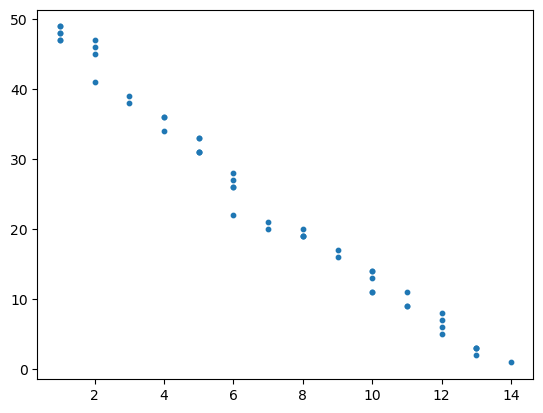

In [71]:
#plotting data
plt.scatter(x_hours,y_ranks,s=10)

In [72]:
#augmenting x_hours
one=np.array([1 for i in range(points)])
X=np.array([one,x_hours])
X=X.T

In [73]:
#assuming smart w using first and last sample for linear model and calculating y_predicted
w1=(y_ranks[-1]-y_ranks[0])/(x_hours[-1]-x_hours[0])
w0=y_ranks[0]-w1*x_hours[0]
w=np.array([w0,w1])
print('Initial w:',w)

y_predicted=np.dot(X,w)
var=y_ranks-y_predicted
loss=np.dot(var,var.T)/2*points

Initial w: [52.69230769 -3.69230769]


Final w: [50.51524991 -3.75506428]


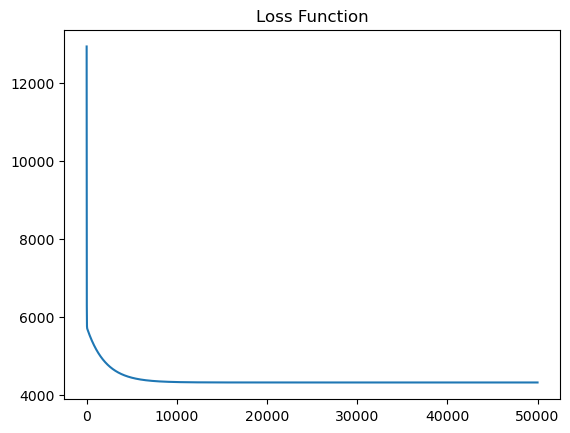

In [74]:
#GRADIENT DESCENT ALGORITHM
learning_rate=0.001
epochs=0
loss_curve=[loss]

while(loss>10 and epochs<50000):
    for i in range(1):
        partialloss=[0,0]
        #gradient descent algorithm
        for j in range(points):
            partialloss=partialloss+X[j]*(y_ranks[j]-y_predicted[j])
        partialloss=partialloss/points
        w=w+learning_rate*partialloss

    #updating y_predicted values and hence finding loss
    y_predicted=np.dot(X,w)
    var=y_ranks-y_predicted
    loss=np.dot(var,var.T)/2*points
    loss_curve.append(loss)
    epochs=epochs+1

print('Final w:',w)
plt.plot(loss_curve)
plt.title("Loss Function")
plt.autoscale()
plt.show()


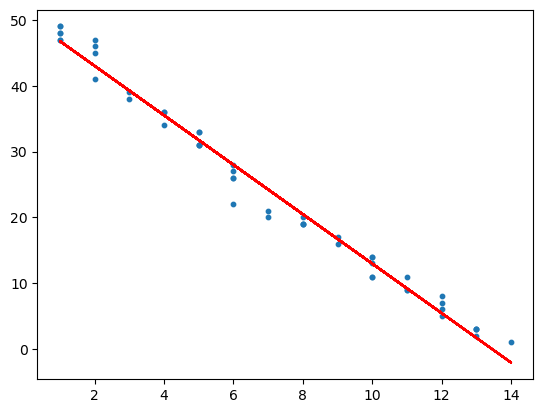

In [75]:
x_values = np.random.randint(low = 1,high = max_hours,size = 100)

# Calculate corresponding y values for the line
y_values = w[1]* x_values + w[0]

plt.scatter(x_hours,y_ranks,s=10)
plt.plot(x_values, y_values, label='Best fit line',color='red')
plt.autoscale()